# Solving Problems with Python: an Introduction to Data Science

## Lesson 6: advanced modeling and visualization

In this lesson you're going to apply your new modelling skills to a slightly harder (but relevant to current events) problem -- disease modelling! We will learn and apply two methods of simulating the spread of a disease. An important note -- this is a fun and interesting exercise, but you should not try to take the results of this and apply them to the real world. The models we will be making are simple and crude and may not accurately reflect what actually happens in a pandemic (like the one we are currently experiencing) so it's still important to trust the experts with their much more sophisticated models! That said, even with these crude models you will be able to see behavior that is backed up by real data, so these are at least a good broad representation of how diseases can spread.

**Note:** This is a pretty long (and complicated!) assignment, so hopefully it will keep you busy for a while! I have tried to make the instructions as clear as possible but as usual I am sure there will be some confusion and some things I could have explained better. When you get stuck please write your questions down and, if possible, send some code to Andrew so that he can get it to me and I will answer you as quickly as possible. Stay safe and wash your hands!!!

### Problem 1: discrete stochastic (random) modeling

Let's assume we know some things about our imaginar illness and we want to simulate its spread through some population (like a city, state, or country). Let's make the following broad and simplified assumptions about the illness:

1. The number of infectious people at the start of day $t$ is given by $It)$. 

2. The total population is denoted by the $N$ and we assume it is constant for all time (ie not taking into account births/deaths).

3. Once a person is infected they instantly become infectious (can spread the disease to others) and they stay that way forever.

4. If a person is infectious, they have some probability $p$ to infect one noninfectious person on a given day $t$. 

To keep track of who is infected, we will create a large matrix the size of the population with each row representing the infected state of the population at $t$ -- if the entry for a person holds a zero we will consider them not infected and if the entry holds a 1 we will consider them infected.

**Pseudo-code for stochastic model:**
```python
#first we need to initialize the population matrix
start_time = 0
stop_time = #number of days you want to simulate
N = #total number of people in simulation
p = #probability of infection
population_array = np.zeros(shape=((stop_time-start_time),N))
#this makes a matrix/array of 0s that has a row of N people for every day t 
initial_infected = #how many people should start as infected? Must be > 0
population_array[start_time][:initial_infected] = 1
#change 0s in the first row (t=0) to 1s to start with some people infected

for t in range(start_time,stop_time):
    for i in range(N):
        if t<(stop_time-1): #can't add on past the last day
            population_array[t+1][i] = population_array[t][i]
            #each infected person stays infected -- carry over to next day
            for j in range(N):
                randNum = #pick a random number between 0 and 1
                if randNum < p and population_array[t][j] == 1:
                    #if person j is infectious and our random number
                    #is beneath threshold then person i gets infected
                    #by person j 
                    population_array[t+1][i] = 1 
                    #change the zero to a 1 at the next time step
                    #to show that we infected a new person
```

### Problem 1: playing with the stochastic model

Implement the pseudo-code above to model the spread of a virus that has a probability of spread $p = 10^{-4}$ through a population of size $N = 1000$ people over 100 days, starting with 10 people initially infected at $t=0$. Plot the total number of infected people as a function of time (hint -- you can use the ```sum``` function on each row of the data you generate to get the total number of infected at time t).

You should get a plot that looks something like this:
<img src="stochasticPlot.png">
Run your simulation 10 times and plot the curves on top of each other -- do you get the same results every time? Why or why not? Try altering the initial conditions (particularly p -- the probability of infection) I gave you to get different curves. You should notice that tiny differences in these conditions can give drastically different results!

**Important note:** try high numbers of N or stop_time at your own peril! There are three nested loops in this code, which makes the performance pretty abysmal in Python. Even with the conditions I gave you it can take ~10-30 seconds to run if your machine is not the best. This is one of the downsides of stochastic modeling -- it can be very computationally expensive, especially in langauges like Python where loops are costly.

**Challenge:** Try to make this model more realistic. Assume that after a period of time (say, 14 days...) that a person who has been infected is no longer infectious. Implement this into your code -- how does it affect the model? You could also implement a fatality rate that would cause the population to shrink over time -- how does this affect the model and what ways can you think of to minimize deaths? 

In [24]:
#your solution to problem 1 here:


### Problem 2: continuous modeling

Let's try to build a fancier (and prettier) simulation, this time using a different approach. Another way to think about the spread of diseases is akin to particles bouncing around in a box -- as these particles collide with each other they can "spread" the disease through random motion, which is actually a relatively safe analogy for what can happen in the real world. 

The first step in this problem has nothing to do with diseases at all -- we need to know how to simulate particles bouncing around in a box! Conceptually it's not too difficult, so let's lay out the following rules for our simulation. 

1. Particles can't leave the box, so we will need code that detects when a particle is at the edge of the box and causes it to "bounce back". 

2. Particles can't travel through each other, so we will need code that detects collisions and deals with this. In this problem we are going to treat the collisions as elastic -- this just means they will bounce off each other perfectly (no loss of energy) like billiard balls.

3. The motion needs to be random, so we will need code that gives each particle its own random velocity.

Let's start with a single particle and try to accomplish objective 1: getting it to bounce off the edge of the box. The scenario we need to program is this: 

<img src="elasticCollision.png">

Image credit: COS 226, Ben Tsou and Kevin Wayne, Princeton (https://introcs.cs.princeton.edu/java/assignments/collisions.html)

The ball/particle has a velocity in both the x and y directions. When it hits either the "top" or "bottom" sides of the box we flip the y direction of the velocity -- likewise when it hits the "left" or "right" sides of the box we will flip the x direction of velocity. Here's some pseudo-code that describes this:

```python
#need to give the particle an initial velocity, position, and size
radius = #radius of particle
vx = #initial velocity in x direction
vy = #initial velocity in y direction
xPos = #initial x position, needs to be inside the box
yPos = #initial y position, needs to be inside the box
#need to set up the box the particle is in
leftSide = -1 #imagine a line at x = -1
rightSide = 1 #a line at x = +1
topSide = 1 #a line at y = +1
bottomSide = -1 #a line at y = -1
#time conditions
tStart = 0 
tStop = 10 
dt = 0.01 #this is the time step, and should be a "small" number
#units here don't matter as long as they match velocity units

xRecord = [] #initialize empty lists to keep track of where
yRecord = [] #the particle has gone inside the box
#now we evolve the system in time
while t < tStop:
    xPos += vx*dt #velocity*time = distance from old spot
    yPos += vy*dt
    xRecord.append(xPos)
    yRecord.append(yPos)
    if (xPos+radius) >= rightSide or (xPos-radius) <= leftSide:
        vx = -vx #bounce back from left or right side
    elif (yPos+radius) >= topSide or (yPos-radius) <= bottomSide:
        vy = -vy #bounce back from top or bottom
    t += dt #next time step
```

#### 2a: implement the above pseudo-code for a single particle in a box

Plot the box and the record of where your particle travelled to confirm that it did indeed stay in the box! Play with the initial condition parameters to try out different things and make sure your code is showing reasonable results for different scenarios.

In [75]:
#your solution to 2a here:


#### 2b: add more particles!

To simulate a disease we obviously will need more than 1 person in our box, but how can we handle collisions between particles? The first thing to do is check if they've collided. We can do this using the distance formula: $d = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2)}$. This is the distance between the centers of each particle, and if this distance is less than or equal to the sum of the radii of both particles we will consider this a collision (ie $R_1+R_2 \leq d$). 

Since our particles are all the same size/mass in this simulation we can simulate the ricochet using the following function I will provide for you. If you are interested in how I derived this let me know and I am happy to show you the proof (or it is a fun exercise to try on your own if you like that sort of thing).

```python 
# This function takes as input four vectors: v1, v2, pos1, and pos2
# these vectors should be formatted like this: v = np.array([vx, vy]) 
# and pos = np.array ([x, y]) 
def velocityUpdate(v1,v2,pos1,pos2):
    vVec1 = v1 - v2
    posVec1 = pos1 - pos2
    vVec2 = v2 - v1
    posVec2 = pos2 - pos1
    v1P = v1 - np.dot(vVec1,posVec1)*posVec1/np.linalg.norm(posVec1)**2
    v2P = v2 - np.dot(vVec2,posVec2)*posVec2/np.linalg.norm(posVec2)**2
    return v1P,v2P
# it returns new vectors for the velocity of 1 and 2 
# USAGE EXAMPLE:
# initial velocities/positions
v1 = np.array([v1x,v1y])
v2 = np.array([v2x,v2y])
pos1 = np.array([x1,y1])
pos2 = np.array([x2,y2])
# update velocities (v prime)
v1P,v2P = velocityUpdate(v1,v2,pos1,pos2)
# get the x and y components of the new velocities (if you want)
v1xP = v1P[0] 
v1yP = v1P[1]
v2xP = v2P[0]
v2yP = v2P[1]
```

**Your turn:** Implement the distance condition in your code to check if there has been a collision, and if there is use the `velocityUpdate` code given above to change the velocities of both particles so that they "bounce off" each other. Start by adding just one new particle (so you have a total of two particles) and plot your solution and make sure it seems reasonable, then generalize this approach for n particles. Once you have it working for two it's pretty easy to add more! You will just need to store the particles and their velocities in big lists, and add loops to check all the different pairs for collisions to update the lists accordingly.

In [74]:
#your solution to 2b goes here: 


#### 2c: zombie particles! 

Now that you have a working particle in a box model, let's turn it into a disease model! The process you need to follow is outlined as follows:

1. Create a list that keeps track of which particles are "infected" -- you can do this with 1s and 0s like we did in problem 1. Start with a couple particles initially infected just like we did before.

2. Everytime an infected particle collides with a healthy one it becomes infected, and you will need to update the list accordingly. 

3. Set your simulation to run until all particles have become infected! 

In this problem you don't need to make a plot of what's happening in the box, but you should try to plot the cumulative number of infections over time like we did in exercise one. You should see a similar curve if your simulation is working correctly!

**Challenge:** Try to make this model more realistic like you did for the stochastic model. Some things to get you started:

1. Add in a probability of infection at collision -- instead of just automatically making each collision result in a new infection, add in a bit of chance like we had with the stochastic model.

2. Make particles less infectious over time -- you can impose a hard cut-off (ie infectious for 14 time steps and then not infectious anymore) or you could also make it decay (make the probability of infecting another particle go down like $e^{-\alpha t}$ where $\alpha$ is some constant).

3. Add in particle deaths. As before, add in a chance to remove a person from the population if they become infected and succumb to the disease. 

4. Implement social distancing measures. Make the initial velocities of the particles slower and/or make the particles smaller in size (so they are less likely to collide). What does this do to the curve? If you have implemented challenge 2 see if you can get this social distancing to result in killing off the virus! 

In [61]:
#your solution to 2c goes here:


-3.0

### Problem 3: animate!

In this section you are going to make your first animations, to better illustrate the results of problems 1 and 2. In the cell below there is some sample code for making an animation -- try to play with it and make sure it will run on your machine (I am not sure if the prison computers have everything required for this, so if you get an error please let me know and I can provide instructions for Andrew/TAs on the necessary extra packages that would need to be installed). 

There are two ways to do this -- either using Python's built in animation software (which is slow and kind of sucks) or using a command line command (which is better but I'm not sure will work on your computers). Try running both cells below and seeing which one works for you.

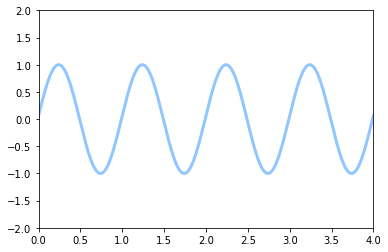

In [82]:
#method 1: built in animation method from matplotlib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
plt.style.use('seaborn-pastel')


fig = plt.figure() #create a figure object
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2)) #create axes for our figure with limits
line, = ax.plot([], [], lw=3) #create an empty line object to be modified by animation

def init(): #this initializes our line with empty data
    line.set_data([], []) 
    return line,
def animate(i): #i here is the frame number
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i)) #y value will change with i
    line.set_data(x, y) #update our line with new info calculated here
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
#operate on figure 'fig' with function 'animate' and initialization 'init'
#do 200 frames (i goes to 200) spaced 20 apart, blit controls whether you redraw 
#the entire plot/animation or just the parts that have changed

anim.save('sine_wave.gif', writer='imagemagick') 
#IF imagemagick doesn't work try 'ffmpeg'

This outputs the following gif!
![SegmentLocal](sine_wave.gif "sine wave")

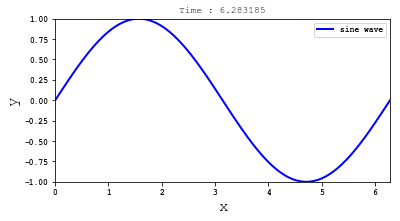

In [95]:
#method 2: manually compiling frames from command line with ffmpeg
#I prefer this way because it's faster, you get more control over the resulting video/gif, and it's more 
#"natural" to program -- but it may not work on your computers...sorry.
import matplotlib.pyplot as plt
%matplotlib inline
#generate some "convincing evidence"
fig = plt.figure(1,figsize=(6,3))
fig.clf()

font = {'family' : 'FreeMono',
        'weight' : 'bold',
        'size'   : 8}	
plt.rc('font', **font) #set all plot font attributes according to above

# Plot the initial conditions
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)

hdl, = plt.plot(x,y,linewidth=2,color='b',label='sine wave')
tstr = 'Time : {:.6f}'.format
htitle = plt.title(tstr(0))

plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xlim([0,2*np.pi])
plt.ylim([-1,1])
plt.legend()
fig.canvas.draw()  
fig.savefig('sineFrame000.png')

tStop = 2*np.pi
tRange = np.linspace(0,tStop,100)
# Plot solution in time
n = 1
for t in tRange:
    y = np.sin(x-t)
    hdl.set_ydata(y)
    htitle.set_text(tstr(t))
    # Refresh plot; update title
    fig.canvas.draw()      
    fig.savefig('sineFrame%03d.png' %n)  #save frames to compile with ffmpeg
    n += 1

In [6]:
import subprocess
#this actually makes the animation by stitching together all the frames and then removing them
def makeAnim():
    subprocess.call(['ffmpeg -framerate 30 -i "sineFrame%03d.png" -c:v libx264 -preset slow -coder 1 -movflags +faststart -g 15 -crf 18 -pix_fmt yuv420p -profile:v high -y -bf 2 -fs 15M "sineMovie.mp4"'],shell=True)
    subprocess.call(['rm *.png'],shell=True) #clear frames
makeAnim()
#display the video in cell below

In [7]:
%%HTML
<video width="600" height="300" controls>
  <source src="sineMovie.mp4" type="video/mp4">
</video>

**Your turn!** Using the examples above, see if you can animate your plot in problem 1 to show how the curve grows over time. Once you've got that figured out, try to make a video of the collisions in your infectious box in problem 2 accompanied by the same curve. To do this you'll need to use the `subplots` command, which you can find an example of in the plotting examples notebook I've already shared with you. You'll also need to color your particles to denote whether they're infected or not -- I suggest red for infected and green for healthy but you can use whatever you like. When you finish, send me your animations -- I'd love to see them!

In [ ]:
#your solution to problem 3 goes here: 
